In [1]:
# Cell 1: Setup and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# Load cleaned data
df = pd.read_csv('../raw_data/metadata_cleaned.csv')
df['publish_time'] = pd.to_datetime(df['publish_time'])

print(f"Loaded cleaned dataset: {df.shape}")
print(f"Date range: {df['publication_year'].min()} - {df['publication_year'].max()}")

Loaded cleaned dataset: (465899, 16)
Date range: 2019.0 - 2023.0


Creating Publications by Year Visualization...


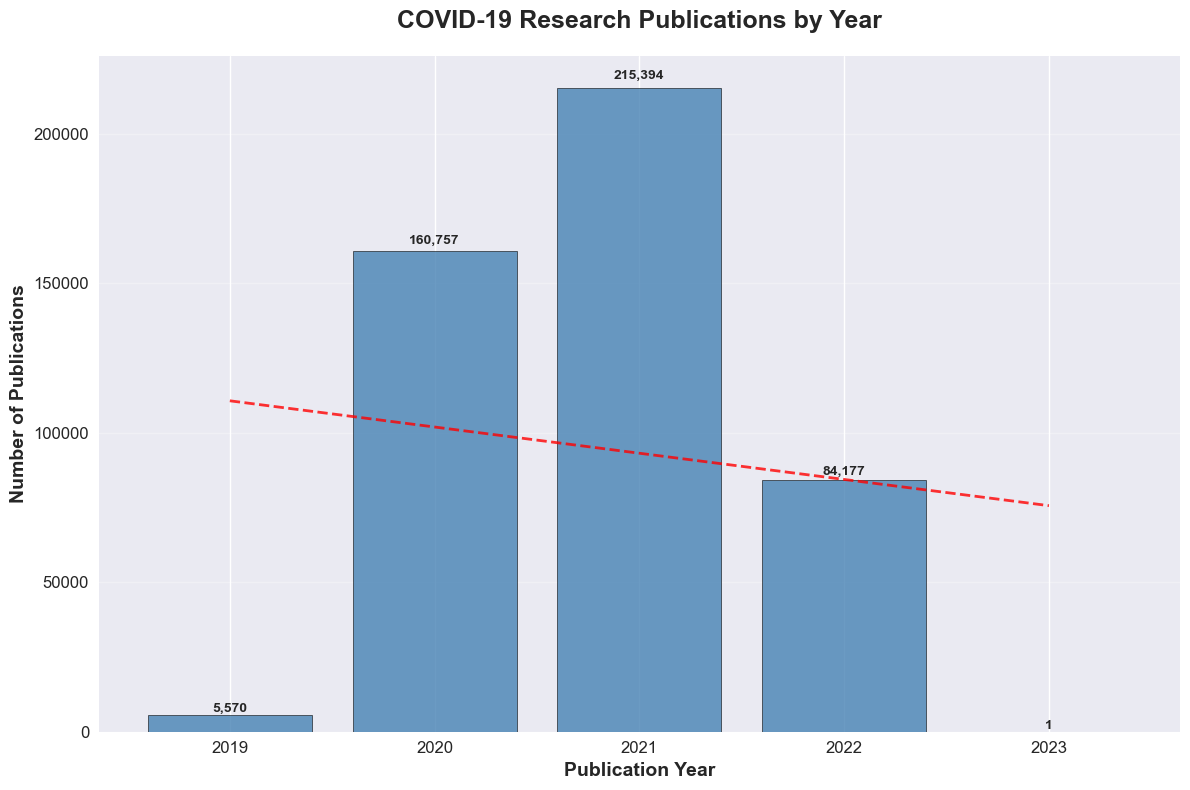

Peak year: 2021.0 with 215,394 publications


In [2]:
# Cell 2: Publications by Year
print("Creating Publications by Year Visualization...")

yearly_counts = df['publication_year'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
bars = plt.bar(yearly_counts.index, yearly_counts.values, 
               color='steelblue', alpha=0.8, edgecolor='black', linewidth=0.5)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

plt.title('COVID-19 Research Publications by Year', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Publication Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Publications', fontsize=14, fontweight='bold')
plt.xticks(yearly_counts.index, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add trend line
z = np.polyfit(yearly_counts.index, yearly_counts.values, 1)
p = np.poly1d(z)
plt.plot(yearly_counts.index, p(yearly_counts.index), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.savefig('../visuals/publications_by_year.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Peak year: {yearly_counts.idxmax()} with {yearly_counts.max():,} publications")

Creating Top Journals Visualization...


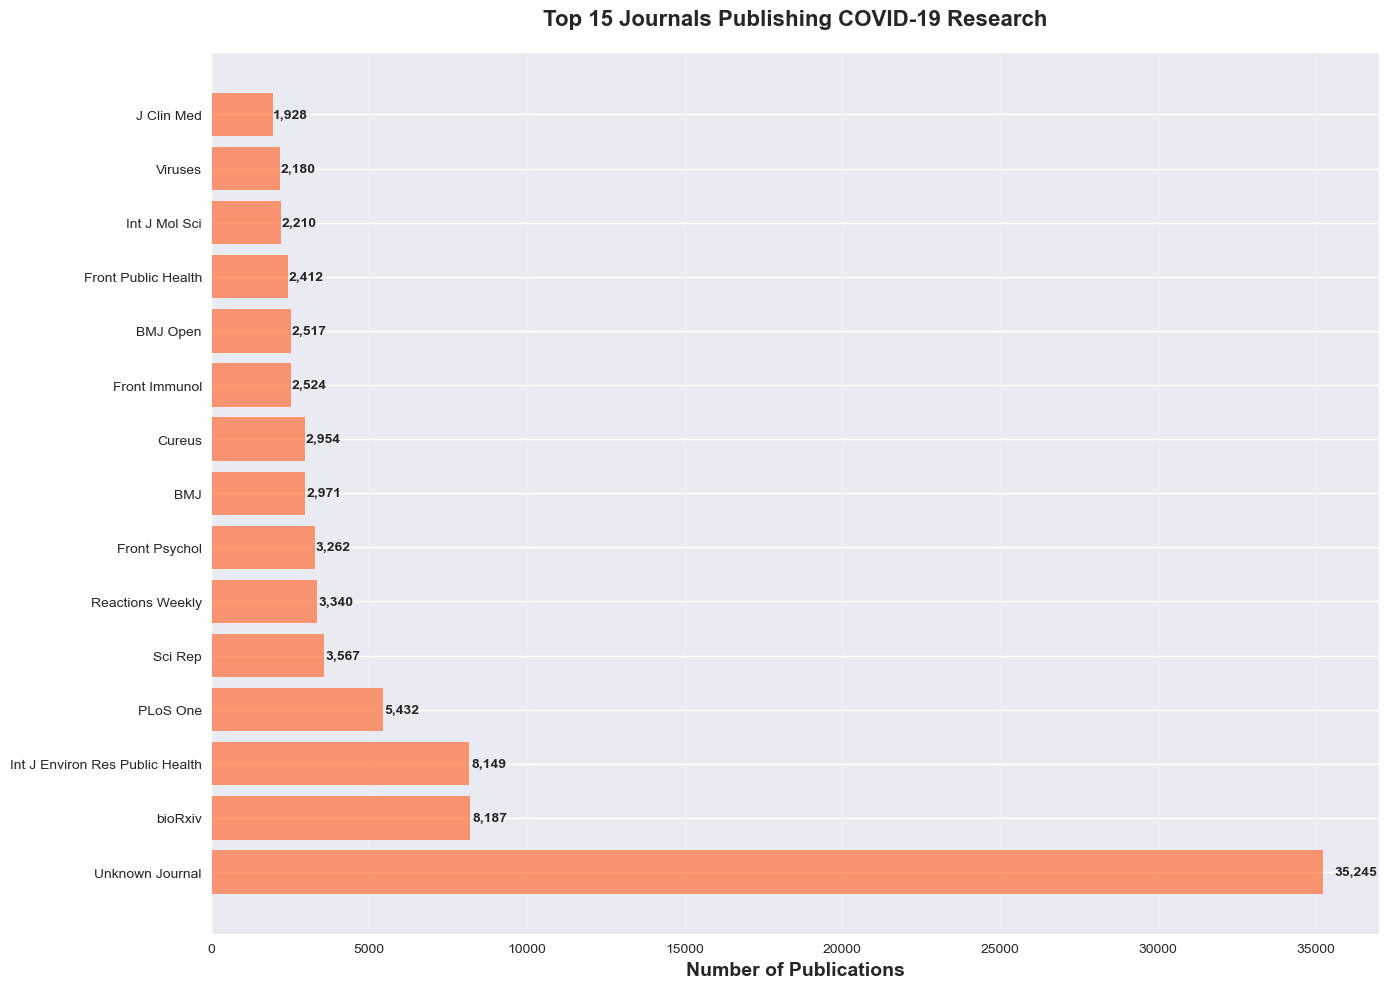

Top journal: Unknown Journal with 35,245 publications


In [3]:
# Cell 3: Top Journals Analysis
print("Creating Top Journals Visualization...")

# Get top 15 journals
top_journals = df['journal'].value_counts().head(15)

plt.figure(figsize=(14, 10))
bars = plt.barh(range(len(top_journals)), top_journals.values, color='coral', alpha=0.8)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', ha='left', va='center', fontweight='bold')

plt.yticks(range(len(top_journals)), 
           [journal[:50] + '...' if len(journal) > 50 else journal 
            for journal in top_journals.index], fontsize=10)
plt.xlabel('Number of Publications', fontsize=14, fontweight='bold')
plt.title('Top 15 Journals Publishing COVID-19 Research', fontsize=16, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../visuals/top_journals.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Top journal: {top_journals.index[0]} with {top_journals.iloc[0]:,} publications")

Creating Monthly Trends Visualization...


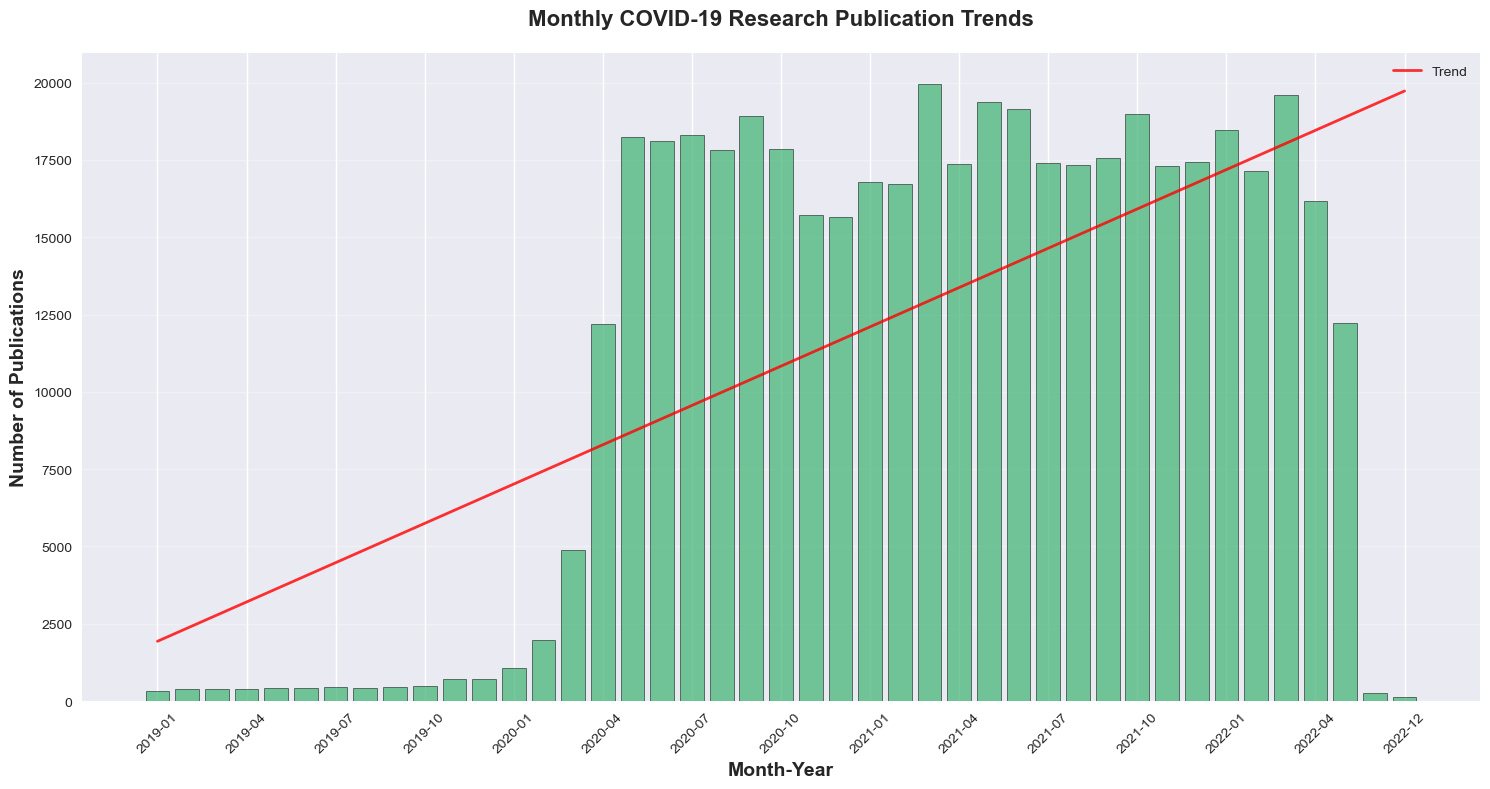

In [4]:
# Cell 4: Monthly Publication Trends
print("Creating Monthly Trends Visualization...")

# Create month-year combinations
df['month_year'] = df['publish_time'].dt.to_period('M')
monthly_counts = df['month_year'].value_counts().sort_index()

# Filter to meaningful range (where we have substantial data)
substantial_months = monthly_counts[monthly_counts >= 100]

plt.figure(figsize=(15, 8))
x_pos = range(len(substantial_months))
bars = plt.bar(x_pos, substantial_months.values, 
               color='mediumseagreen', alpha=0.7, edgecolor='black', linewidth=0.5)

plt.title('Monthly COVID-19 Research Publication Trends', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month-Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Publications', fontsize=14, fontweight='bold')
plt.xticks(x_pos[::3], [str(period) for period in substantial_months.index[::3]], 
           rotation=45, fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Add trend line
z = np.polyfit(x_pos, substantial_months.values, 1)
p = np.poly1d(z)
plt.plot(x_pos, p(x_pos), "r-", alpha=0.8, linewidth=2, label='Trend')
plt.legend()

plt.tight_layout()
plt.savefig('../visuals/monthly_trend.png', dpi=300, bbox_inches='tight')
plt.show()

Creating Word Cloud...


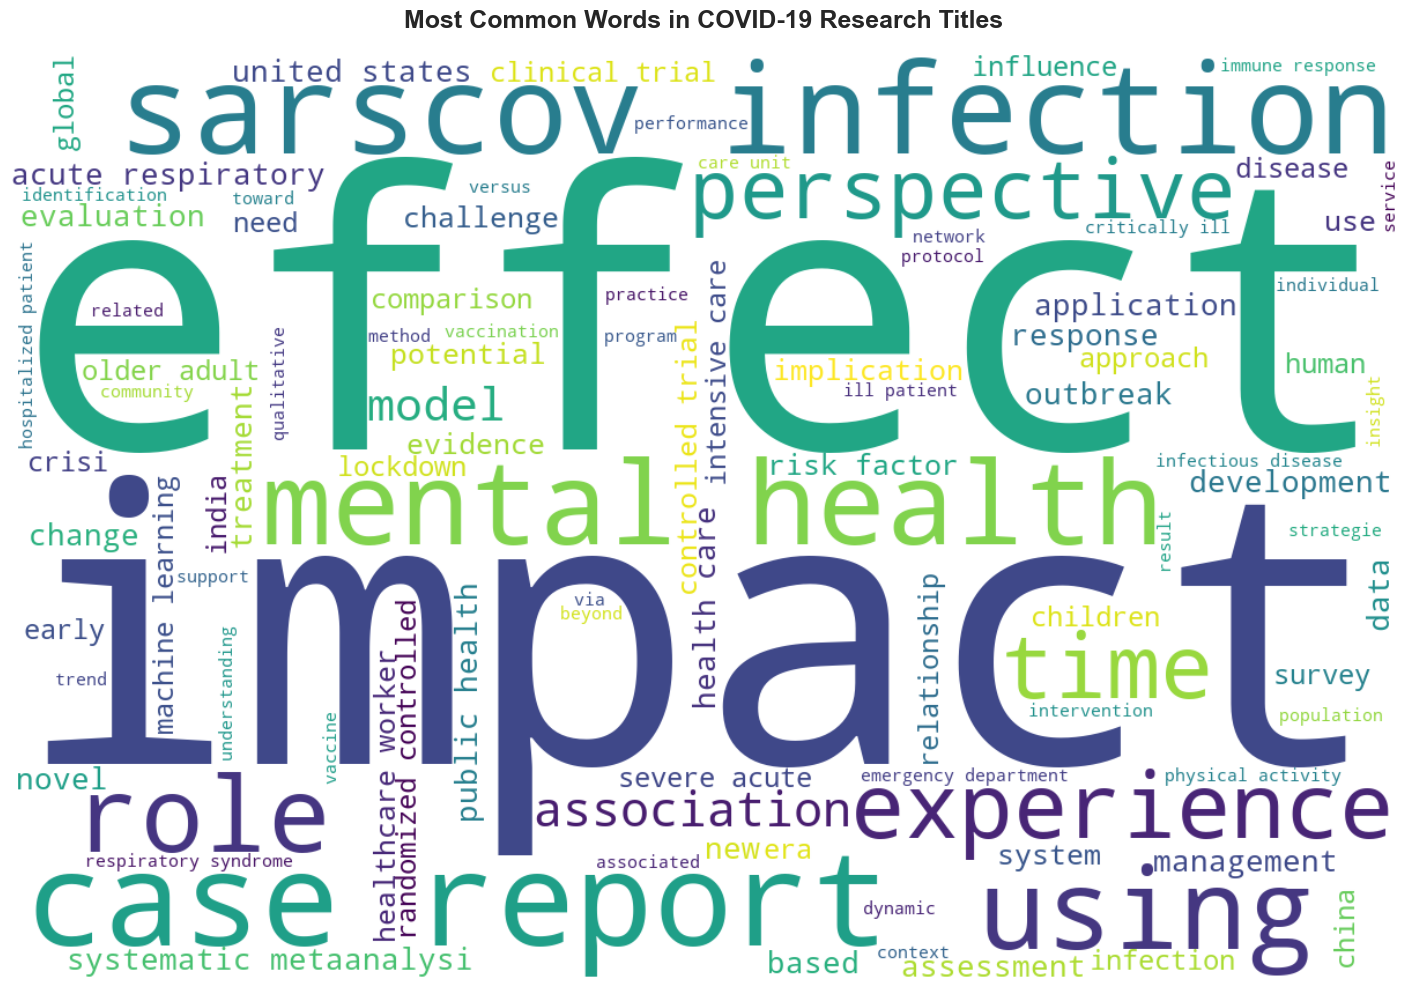

In [5]:
# Cell 5: Word Cloud Generation
print("Creating Word Cloud...")

# Combine all titles for word cloud
all_titles = ' '.join(df['title'].dropna().astype(str))

# Clean text for word cloud
def clean_text_for_wordcloud(text):
    # Remove common stop words and non-informative words
    stop_words = {'the', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 
                  'by', 'from', 'up', 'about', 'into', 'through', 'during', 'before', 
                  'after', 'above', 'below', 'between', 'among', 'through', 'during',
                  'covid', '19', 'coronavirus', 'sars', 'cov', 'pandemic', 'study', 
                  'analysis', 'research', 'paper', 'article', 'review'}
    
    # Remove special characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    words = text.split()
    return ' '.join([word for word in words if word not in stop_words and len(word) > 2])

clean_titles = clean_text_for_wordcloud(all_titles)

# Generate word cloud
wordcloud = WordCloud(width=1200, height=800, 
                     background_color='white',
                     colormap='viridis',
                     max_words=100,
                     relative_scaling=0.5,
                     random_state=42).generate(clean_titles)

plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in COVID-19 Research Titles', 
          fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('../visuals/word_cloud.png', dpi=300, bbox_inches='tight')
plt.show()

Creating Source Distribution Visualization...


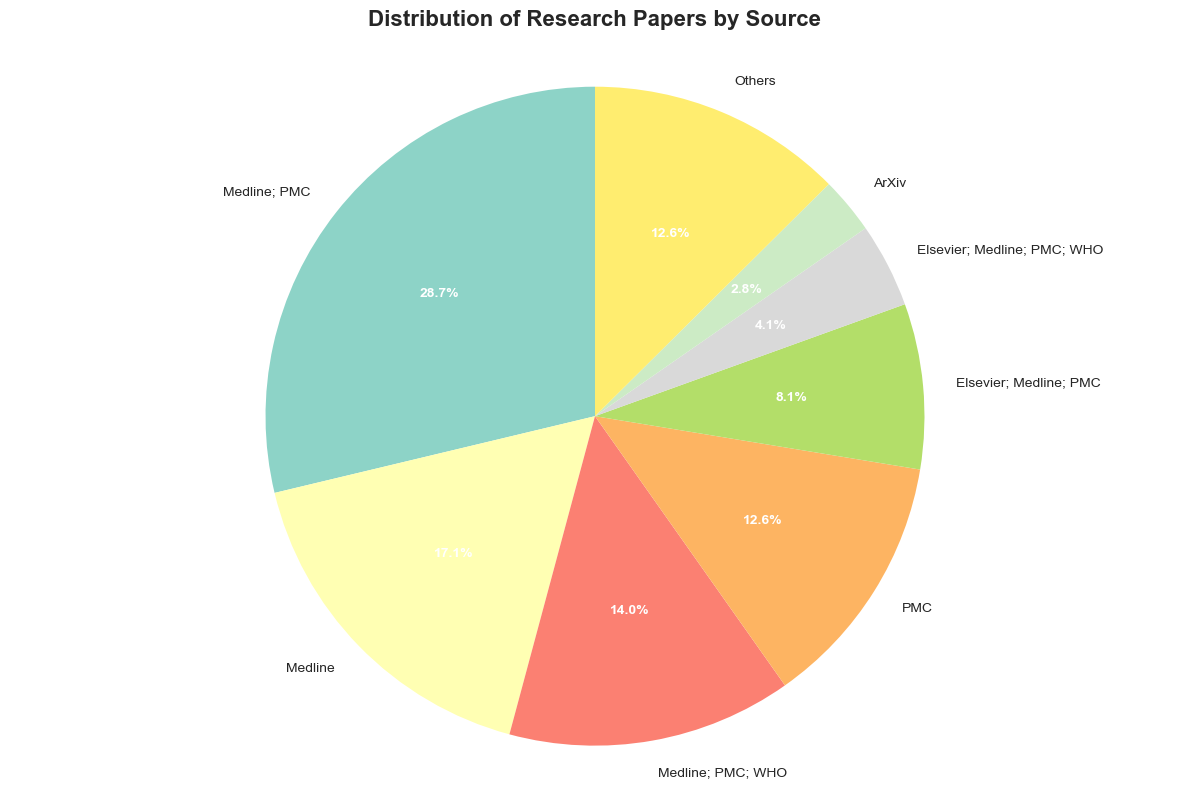

In [6]:
# Cell 6: Source Distribution
print("Creating Source Distribution Visualization...")

source_counts = df['source'].value_counts()
if len(source_counts) > 8:
    top_sources = source_counts.head(7)
    other_count = source_counts.iloc[7:].sum()
    plot_data = pd.concat([top_sources, pd.Series({'Others': other_count})])
else:
    plot_data = source_counts

plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(plot_data)))
wedges, texts, autotexts = plt.pie(plot_data.values, labels=plot_data.index, 
                                   autopct='%1.1f%%', startangle=90, colors=colors)

# Enhance text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.title('Distribution of Research Papers by Source', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')

plt.tight_layout()
plt.savefig('../visuals/source_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

Performing Advanced Analytics...


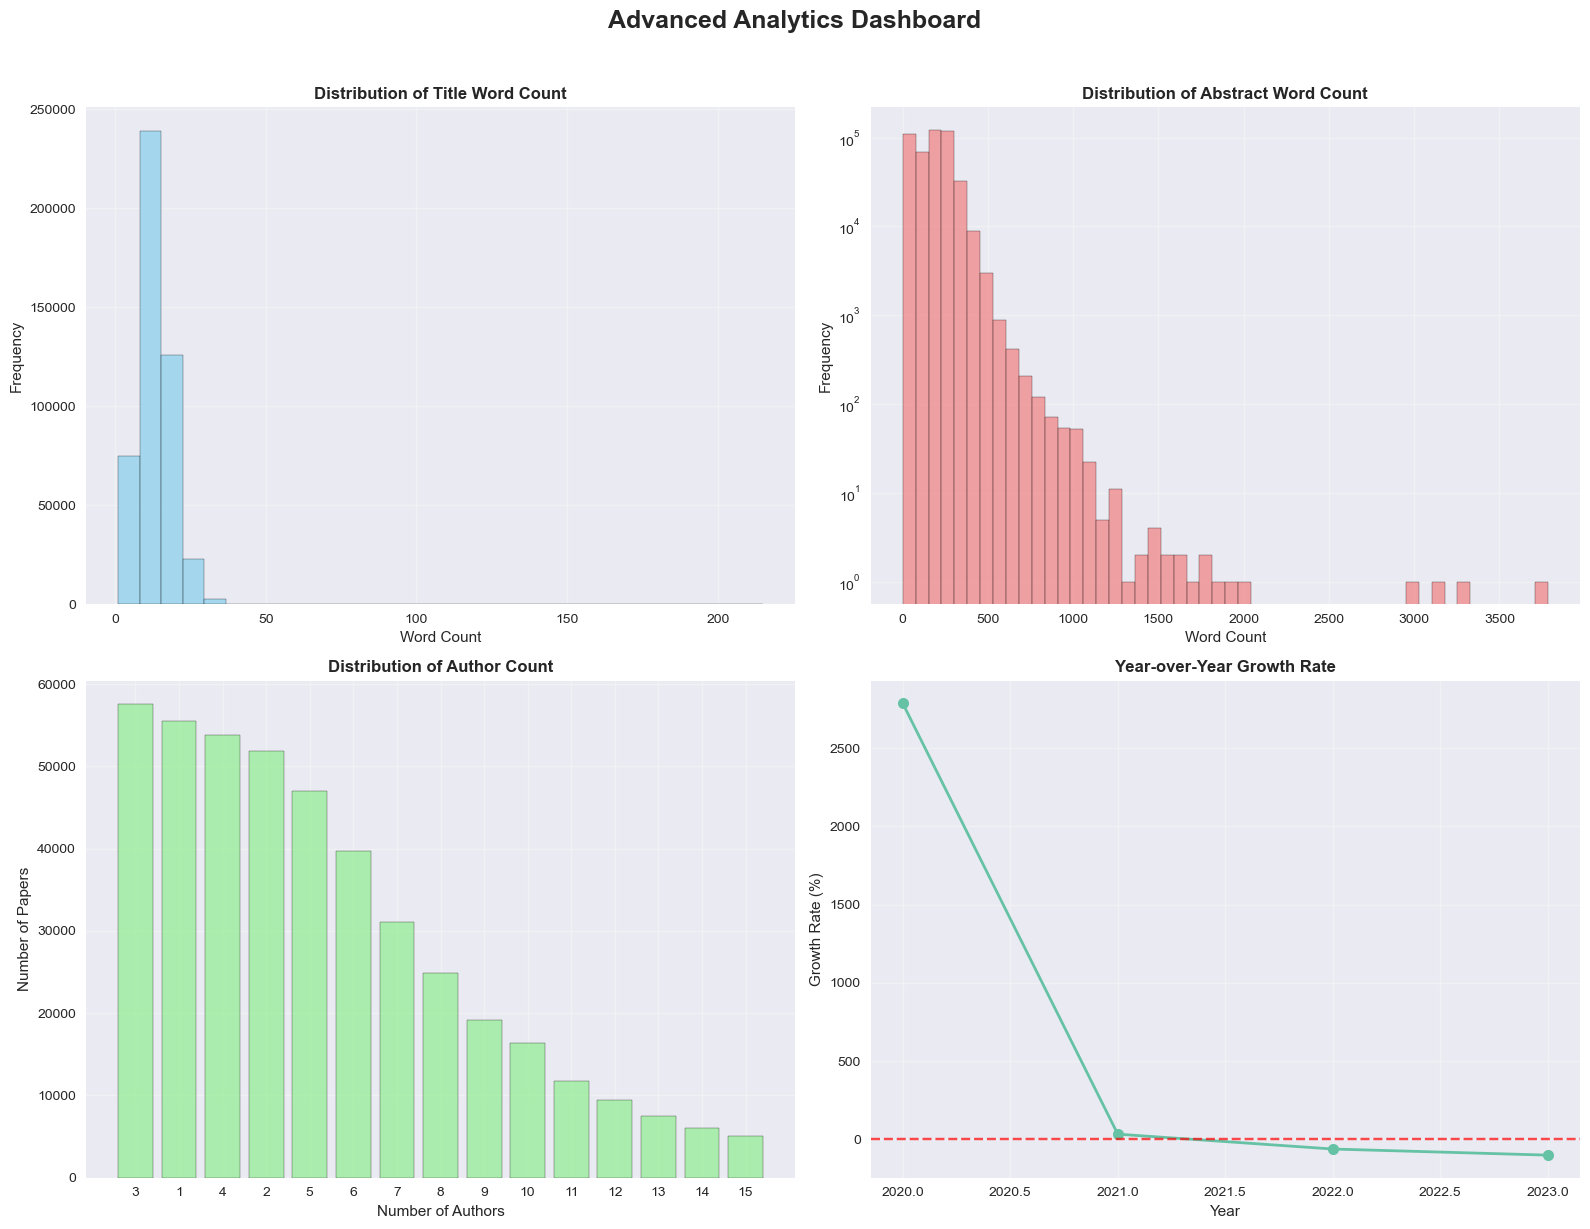

In [7]:
# Cell 7: Advanced Analytics
print("Performing Advanced Analytics...")

# Paper length analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Title word count distribution
ax1.hist(df['title_word_count'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Title Word Count', fontweight='bold')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')
ax1.grid(alpha=0.3)

# Abstract word count distribution (log scale due to wide range)
ax2.hist(df[df['abstract_word_count'] > 0]['abstract_word_count'], 
         bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_title('Distribution of Abstract Word Count', fontweight='bold')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Frequency')
ax2.set_yscale('log')
ax2.grid(alpha=0.3)

# Author count distribution
author_counts = df['author_count'].value_counts().head(15)
ax3.bar(range(len(author_counts)), author_counts.values, 
        alpha=0.7, color='lightgreen', edgecolor='black')
ax3.set_title('Distribution of Author Count', fontweight='bold')
ax3.set_xlabel('Number of Authors')
ax3.set_ylabel('Number of Papers')
ax3.set_xticks(range(len(author_counts)))
ax3.set_xticklabels(author_counts.index)
ax3.grid(alpha=0.3)

# Yearly growth rate
yearly_counts = df['publication_year'].value_counts().sort_index()
growth_rates = yearly_counts.pct_change() * 100
ax4.plot(growth_rates.index, growth_rates.values, marker='o', linewidth=2, markersize=8)
ax4.set_title('Year-over-Year Growth Rate', fontweight='bold')
ax4.set_xlabel('Year')
ax4.set_ylabel('Growth Rate (%)')
ax4.grid(alpha=0.3)
ax4.axhline(y=0, color='red', linestyle='--', alpha=0.7)

plt.suptitle('Advanced Analytics Dashboard', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../visuals/advanced_analytics.png', dpi=300, bbox_inches='tight')
plt.show()